In [1]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast
pandas.options.display.max_colwidth = 100000

## Keep all topics

In [13]:
all_df = pandas.read_csv('data/all_candidates_nop.csv') 
#TOPICS = ['Immigration', 'Campaign Finance', 'Foreign Policy/National Security','Abortion']
#all_df = all_df[(all_df['top_topic'].isin(TOPICS))]
deduped_title = all_df.drop_duplicates('title') 

In [14]:
re_all = 'hillary|clinton|bernie|sanders|marco|rubio|donald|trump|ted|cruz|john|kasich'
clinton_only = deduped_title[(~deduped_title['title'].str.contains('bernie|sanders|marco|rubio|donald|trump|ted|cruz|john|kasich', case=False))]
trump_only = deduped_title[(~deduped_title['title'].str.contains('hillary|clinton|bernie|sanders|marco|rubio|ted|cruz|john|kasich', case=False))]
sanders_only = deduped_title[(~deduped_title['title'].str.contains('hillary|clinton|marco|rubio|donald|trump|ted|cruz|john|kasich', case=False))]
cruz_only = deduped_title[(~deduped_title['title'].str.contains('bernie|sanders|hillary|clinton|marco|rubio|donald|trump|john|kasich', case=False))]

In [15]:
print len(trump_only)
print len(clinton_only)
print len(sanders_only)
print len(cruz_only)

666
181
135
177


In [19]:
all_df = pandas.concat([clinton_only, trump_only, sanders_only, cruz_only])
all_df.to_csv('data/all_candidates_all_topics_single_candidate_stories.csv')

# Get top n % by {Flesch, G-F}

CLINTON

HEAD


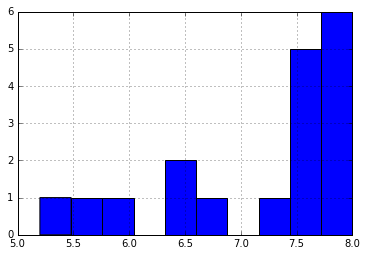

nyt          7
politico     4
wsj          2
npr          1
mcclatchy    1
latimes      1
cnn          1
huffpo       1
Name: org, dtype: int64
TAIL


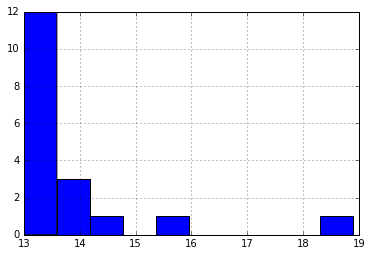

fox         6
cnn         4
npr         2
latimes     2
wsj         1
politico    1
huffpo      1
ap          1
Name: org, dtype: int64
TRUMP

HEAD


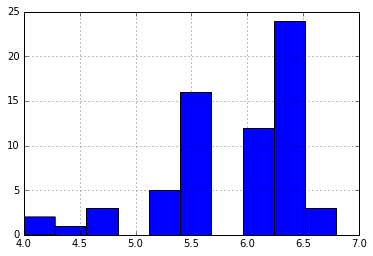

nyt          29
politico     13
huffpo        6
wsj           5
fox           4
mcclatchy     3
npr           2
cnn           2
ap            2
Name: org, dtype: int64
TAIL


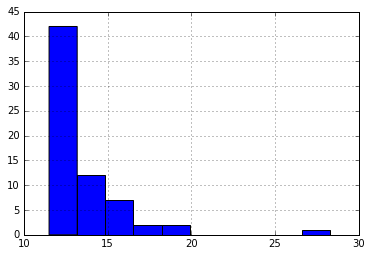

huffpo       17
buzzfeed     12
cnn           8
reuters       8
latimes       7
fox           4
nyt           2
politico      2
ap            2
wsj           2
mcclatchy     1
npr           1
Name: org, dtype: int64
CRUZ

HEAD


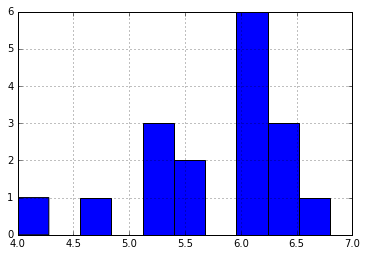

nyt         8
wsj         4
cnn         2
politico    1
huffpo      1
ap          1
Name: org, dtype: int64
TAIL


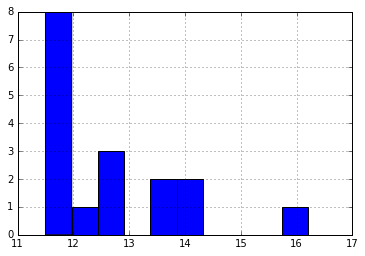

cnn         4
huffpo      4
politico    3
buzzfeed    2
nyt         1
reuters     1
ap          1
wsj         1
Name: org, dtype: int64
SANDERS

HEAD


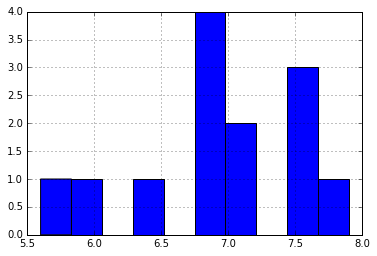

politico    6
nyt         4
wsj         3
Name: org, dtype: int64
TAIL


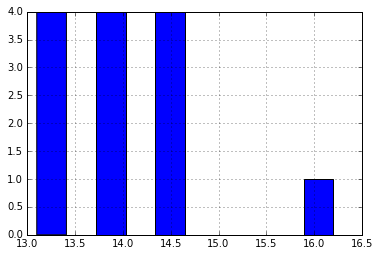

huffpo      11
cnn          1
politico     1
Name: org, dtype: int64


In [48]:
CANDIDATES = ['clinton', 'trump', 'cruz', 'sanders']
for c in CANDIDATES:
    print c.upper()
    print
    sorted_c = all_df[all_df['candidate'] == c].sort_values('flesch')
    n = len(sorted_c)
    head = sorted_c.head(int(n*.10))
    tail = sorted_c.tail(int(n*.10))
    print "HEAD"
    head.flesch.hist()
    matplotlib.pyplot.show()
    print head.org.value_counts()
    head.top_topic.value_counts()
    head[['top_topic', 'org']]
    
    print "TAIL"
    tail.flesch.hist()
    matplotlib.pyplot.show()
    print tail.org.value_counts()
    tail.top_topic.value_counts()
    tail[['top_topic', 'org']]


In [54]:
ORGS = set(all_df.org) 

# Also look at Topics dist

In [61]:
CANDIDATES = ['clinton', 'trump', 'cruz', 'sanders']
for c in CANDIDATES:
    print c.upper()
    sorted_c = all_df[all_df['candidate'] == c].sort_values('flesch')
    n = len(sorted_c)
    head = sorted_c.head(int(n*.10))
    tail = sorted_c.tail(int(n*.10))
    print "LOW"
    print head.top_topic.value_counts()
    print
    #print head[['org', 'top_topic', 'flesch']]
    print
    print "HIGH"
    print tail.top_topic.value_counts()
    print
    #print tail[['org', 'top_topic', 'flesch']]
    print
    """
    for o in ORGS:
        print "LOW"
        head
    print "LOW" 
    matplotlib.pyplot.show()
    print head.org.value_counts()
    head.top_topic.value_counts()
     
    print "HIGH"
    tail.flesch.hist()
    matplotlib.pyplot.show()
    print tail.org.value_counts()
    tail.top_topic.value_counts()
    tail[['top_topic', 'org']]
    """


CLINTON
LOW
Campaign Finance                    9
Health Care                         3
Foreign Policy/National Security    2
Budget/Taxation                     1
Ethics                              1
Education                           1
Economy                             1
Name: top_topic, dtype: int64


HIGH
Ethics                              6
Foreign Policy/National Security    4
Abortion                            2
Financial Regulation                1
Immigration                         1
Jobs/Employment                     1
Economy                             1
Health Care                         1
Campaign Finance                    1
Name: top_topic, dtype: int64


TRUMP
LOW
Foreign Policy/National Security    18
Campaign Finance                    12
Immigration                         10
Abortion                             6
Health Care                          6
LGBT Issues                          6
Racial Issues                        2
Veterans                    